# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
sns.set_style('whitegrid')

### **Overview of Data**
* `PassengerId` is the unique id of the row and it doesn't have any effect on target
* `Survived` is the target variable we are trying to predict (**0** or **1**):
    - **1 = Survived**
    - **0 = Not Survived**
* `Pclass` (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has **3** unique values (**1**,  **2 **or **3**):
    - **1 = Upper Class**
    - **2 = Middle Class**
    - **3 = Lower Class**
* `Name`, `Sex` and `Age` are self-explanatory
* `SibSp` is the total number of the passengers' siblings and spouse
* `Parch` is the total number of the passengers' parents and children
* `Ticket` is the ticket number of the passenger
* `Fare` is the passenger fare
* `Cabin` is the cabin number of the passenger
* `Embarked` is port of embarkation and it is a categorical feature which has **3** unique values (**C**, **Q** or **S**):
    - **C = Cherbourg**
    - **Q = Queenstown**
    - **S = Southampton**

# Reading in the "Titanic Train" dataset. Please make sure you point Pandas to the right location on your system

In [2]:
train = pd.read_csv('titanic/train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Lets check if we have missing data

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

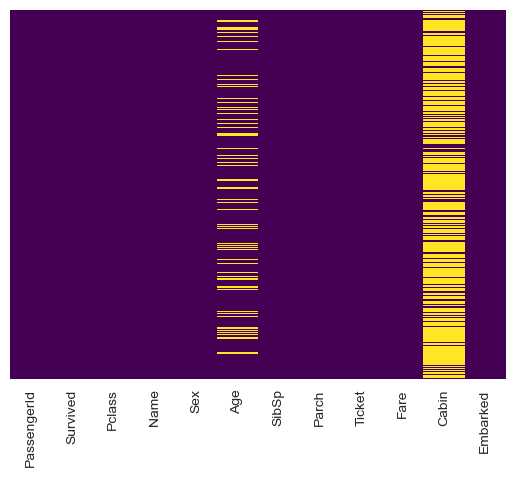

In [6]:
# Every yellow line indicates true (meaning where we have null values)

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis');

### ****  OBSERVATION:
> * From the plot above, we can visually see that we have some null values in the "Age" and a lot more null values in "Cabin",  
> * You will need to decide on how to deal with both of them. 
> * For instance, you may choose to exclude "Cabin" entirely from your analysis or create dummy values (zero for no information of Cabin or 1 for having Cabin information). 
> * Also, we can decide to use an aggregate of the ages to fix the missing ages. Or exclude the rows that have missing "Ages".`

# Let's get a visual idea of Survivers
* `Survived` is the target variable we are trying to predict (**0** or **1**):
    - **1 = Survived**
    - **0 = Not Survived**

In [16]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

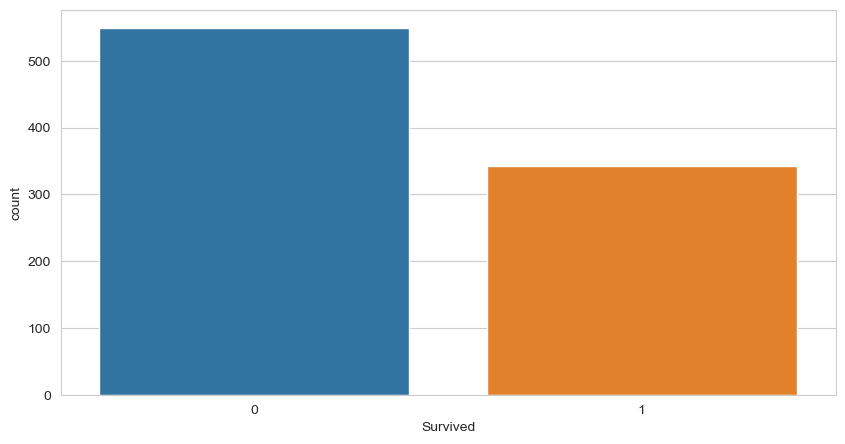

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(x='Survived',data=train);

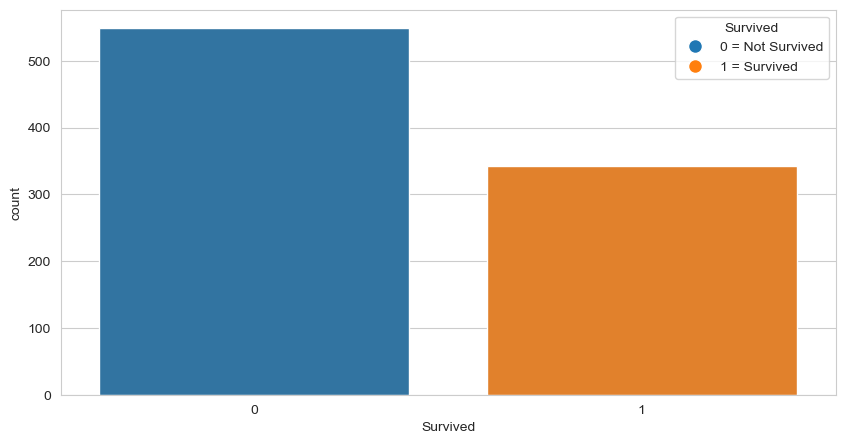

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x='Survived',data=train)

# Add legend manually
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette()[0], markersize=10, label='0 = Not Survived'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette()[1], markersize=10, label='1 = Survived')]
plt.legend(handles=legend_elements, title="Survived", loc='upper right')

plt.show()

# Let's get a visual idea of Survivers based on males and females

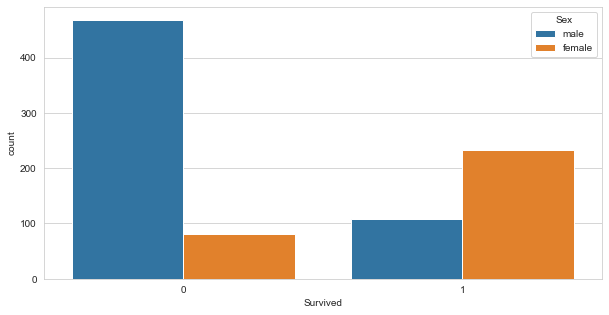

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(x='Survived',hue='Sex',data=train)

### *** OBSERVATION:
> * From the above plot, we can begin to see that there seems to be some trend. 
> * It looks like people onboard that were females were more likely to survive when compared to men. 
> * You can decide to do some further analysis on this.

# We can still do some more visual explorations on the passenger class.
* `Pclass` (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has **3** unique values (**1**,  **2 **or **3**):
    - **1 = Upper Class**
    - **2 = Middle Class**
    - **3 = Lower Class**

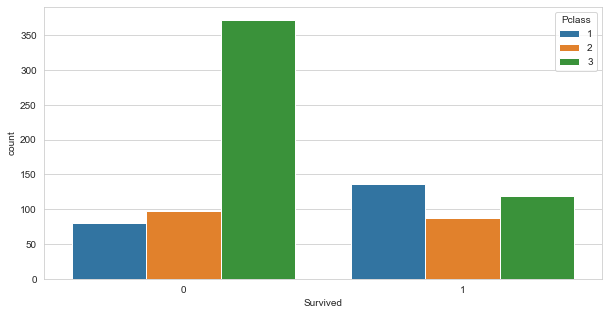

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x='Survived',hue='Pclass',data=train)
plt.show()

### *** OBSERVATION:
> * We can see some trend here also from this plot, 
> * a large majority of people in the 3rd class did not survive. This was the cheapest class to get into. 
> * We can also see that amongst the number of people that survived a good number of them came from the higher classes (1 and 2). 
> * But it would be helpful to know the number of people that were in each class. 

____________________________________________________________________________________

# Let's also check the ages of people on the Titanic

In [25]:
train['Age'].isnull().sum()

177

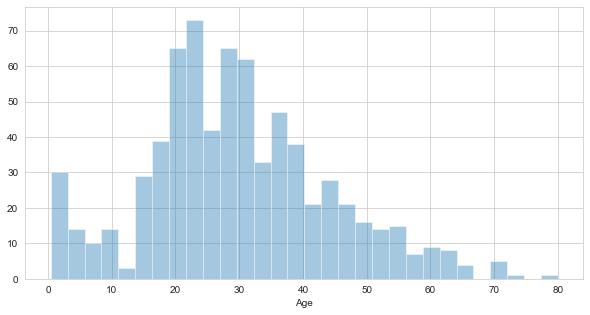

In [10]:
# use a histoisnullto visualize this. We will also just drop null values for now

plt.figure(figsize=(10,5))
sns.distplot(train['Age'].dropna(),kde=False, bins =30)

### *** OBSERVATION:
> * This is an interesting plot. 
> * We seem to have almost a bimodal distribution where we have a few children between the ages of 0 and 10. 
> * After that, we begin to get an average Age between 20 and 30.



![bimodal.png](bimodal.png)
##### WHAT IS BIMODAL DISTRIBUTION?
`A bimodal distribution is a probability distribution characterized by two distinct peaks or modes. This means that the dataset exhibits two prominent groups or clusters of data points. Each mode represents a separate underlying process or phenomenon contributing to the overall dataset.`


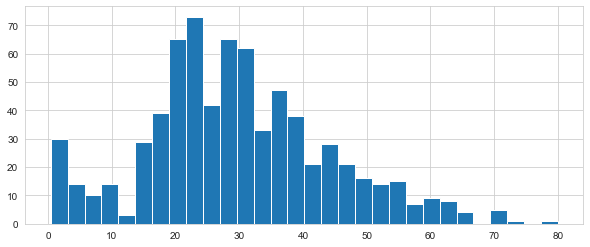

In [11]:
# **** We can create this same plot with Matplotlib as shown below

plt.figure(figsize=(10,4))
plt.hist(train['Age'].dropna(),bins=30)

plt.show()

In [12]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

__________________________________________________________________________________________________________________
# Let's explore the number of siblings or spouses on board

In [26]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

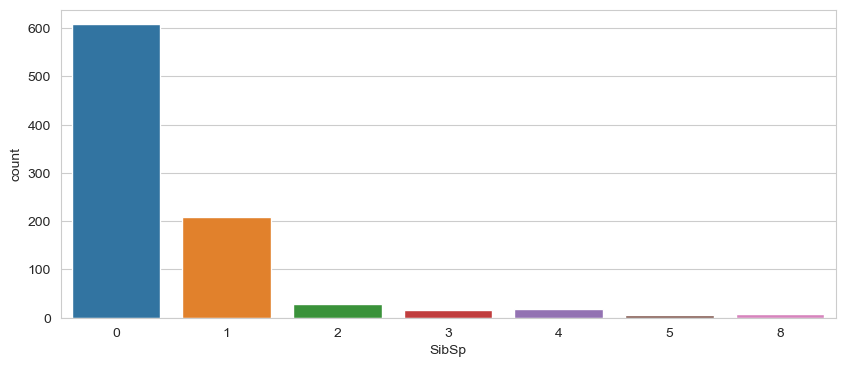

In [27]:
plt.figure(figsize=(10,4))
sns.countplot(x='SibSp',data=train);

### ***OBSERVATION:
> * From this plot, we can immediately see that most people on board did not have a sibling or a spouse on board

________________________________________________________________________________________
# We can also have a look at the "Fare". How much people paid. We can use a histogram for this

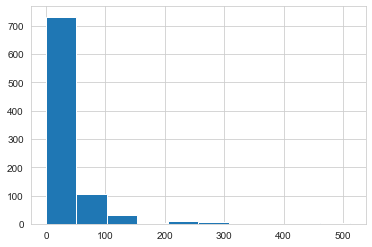

In [14]:
train['Fare'].hist()
plt.show()

### ****OBSERVATION: 
> * With this first histogram plot above, we can see that we have a wide range of values. 
> * with a large spread between 0 and 100. 
> * WE can increase the number of bins to get some more inisght into this

##### BINS
The concept of "bins" in the context of histograms refers to the number of intervals or categories you divide your data into for visualization. Each bin represents a specific range of values, and the height of the bar for a given bin reflects the number of data points that fall within its range.

> bins=40: This divides the range of fare values into 40 intervals or "bins". If, for example, the fares range from £0 to £400 and you have 40 bins, each bin would represent a range of £10 (£400/40). So, the first bin might represent fares from £0 to £10, the second from £10 to £20, and so on.

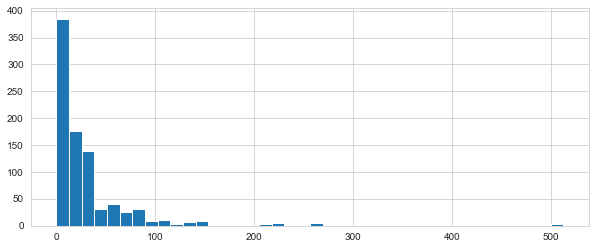

In [15]:
train['Fare'].hist(bins=40,figsize=(10,4))
plt.show()

### ***OBSERVATION:
> * From the above plot, we can see that a good majority of the purchases were between 0 and 50. 
> * Remember from our exploration above. We recall that more people in the lower class died. 
> * This plot confirms that we have more people paying a lower fare.

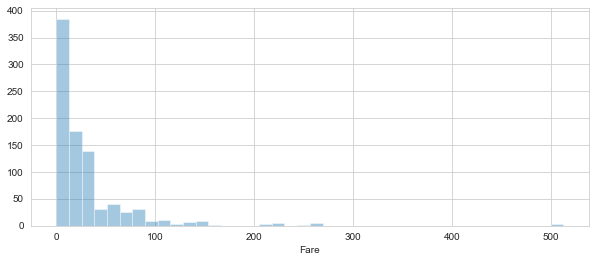

In [16]:
# * We can also use Seaborn to create the same plot above

plt.figure(figsize=(10,4))
sns.distplot(train['Fare'],kde=False, bins=40)

# We can also do this same plot interactively, using Cufflinks. However, you will need to install the library

In [17]:
import cufflinks as cf

In [18]:
# This is telling cufflinks that we want to operate offline
cf.go_offline()

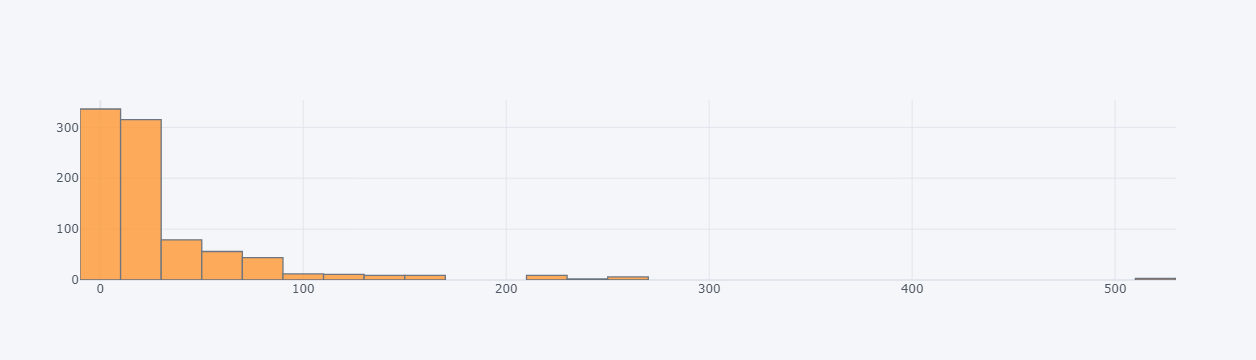

In [19]:
train['Fare'].iplot(kind='hist',bins=40)

In [29]:
#import cufflinks as cf

In [13]:
#!pip install cufflinks

In [14]:
# This is telling cufflinks that we want to operate offline
#cf.go_offline()

In [28]:
#train['Fare'].iplot(kind='hist',bins=40)